In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/train_data_new.csv')
test_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/test_data_new.csv')

In [3]:
train_data.head()

,team_wicket_loss_average,team_count_50runs_last15,team_winp_last5,team_bowler_performance_ratio,team_strike_rate,team_avg_wicket,team_batting_strength,team_win_rate_at_venue,team_batsman_performance_index,team_overall_win_rate,...,team_avg_eco,team_avg_score_ground_ratio,avg_score_ground_batting_first_ratio,match_experience_score_ratio,boundary_frequency_ratio,avg_runs_powerplay_ratio,total_wickets_bowlers_recent_ratio,total_runs_top_batsmen_recent_ratio,total_runs_top_batsmen_ratio,winner_01
0,-1.368785,1.210788,0.672131,1.244528,2.148438,1.238807,1.173089,7.071068e-01,1.972308,-0.083475,...,-0.554419,-0.104744,0.046338,1.368785,0.738186,0.115396,1.316632,1.178372,1.478076,1
1,-1.041201,0.564618,1.952381,-0.461919,-1.112081,-0.521669,-0.091446,1.490116e-08,-1.107182,0.854515,...,-0.285641,0.191746,0.416732,0.975199,-0.595941,0.247339,-0.893293,-0.088788,1.107182,0
2,0.485610,-0.232356,0.672131,0.615018,-0.497557,0.352594,-0.035741,1.490116e-08,-0.369545,-0.667032,...,-0.172086,0.349779,-0.418176,-1.494046,-0.244610,-0.470772,0.618219,-0.035741,-1.396318,0
3,0.003970,1.432296,1.975610,-0.485610,1.162619,-0.527744,1.285775,1.490116e-08,0.762741,0.324563,...,-0.531796,0.274726,1.279749,-0.453102,0.375219,0.913194,-0.406649,1.291848,-0.220136,0
4,1.589567,-0.294019,1.327869,0.366713,0.222848,0.041039,-0.080819,1.000000e+00,0.225562,-0.738186,...,0.204372,-0.776981,-0.846914,-0.435573,-0.476694,0.521669,0.068874,0.206596,-0.461919,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density(train_data, test_data, column_name):

    title = f"'Density Plot of {column_name}"
    xlabel = column_name
    ylabel = 'Density'
   
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train_data[column_name], fill=True, label='Train Data')
    sns.kdeplot(test_data[column_name], fill=True, label='Test Data')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [5]:
# plot_density(train_data, test_data, 'team_wicket_loss_average')

In [6]:
# for col in train_data.columns:
#     plot_density(train_data, test_data, col)

In [7]:
train_data.corr()['winner_01'].sort_values()

avg_score_ground_batting_first_ratio   -0.226530
team_avg_score_ground_ratio            -0.219863
team_win_percentage_fielding_first     -0.219447
match_experience_score_ratio           -0.219131
team_batting_strength                  -0.190013
total_runs_top_batsmen_recent_ratio    -0.186817
team_batsman_runs_recent               -0.186817
total_runs_top_batsmen_ratio           -0.182399
team_bowler_performance_ratio          -0.166911
team_batsman_performance_recent        -0.160832
team_avg_wicket                        -0.157641
team_pom_frequency                     -0.157227
team_avg_wickets_top5_bowlers          -0.151704
team_count_50runs_last15               -0.147812
total_wickets_bowlers_recent_ratio     -0.145209
boundary_frequency_ratio               -0.143416
avg_runs_powerplay_ratio               -0.142774
team_strike_rate                       -0.132729
team_count_100runs_ratio_last15        -0.126637
team_batsman_performance_index         -0.110905
team_SR             

## Feature Selection

### 1. Recursive Feature Elimination (RFE)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# Define the features and target variable
X = train_data.drop('winner_01', axis=1)  # Assuming 'winner_01' is the target variable
y = train_data['winner_01']

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the dataset into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_imputed_df, y, test_size=0.0, random_state=42)
X_train = X_imputed_df
y_train = y

# Create a RandomForest classifier to use with RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE with RandomForest for the top 15 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected features:", selected_features)

# Model training can be done here using the selected features
# For example:
# X_train_selected = X_train[selected_features]
# X_val_selected = X_val[selected_features]


Selected features: Index(['team_bowler_performance_ratio', 'team_batting_strength',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio'],
      dtype='object')


Selected features: Index(['team_bowler_performance_ratio', 'team_strike_rate', 'team_avg_wicket',
       'team_batting_strength', 'team_batsman_performance_recent',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio', 'boundary_frequency_ratio',
       'avg_runs_powerplay_ratio'],
      dtype='object')

In [9]:
# selected_features = train_data.corr()['winner_01'].sort_values()[:10].index

In [10]:
# selected_features

## Model

In [11]:
train_data.fillna(0, inplace=True)

In [12]:
df = train_data[selected_features]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df
# y = df['winner_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((758, 10), (758,), (190, 10), (190,))

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined

# Initialize models
GBM_model = GradientBoostingClassifier()
LGBM_model = LGBMClassifier()
XGB_model = XGBClassifier()
CatBoost_model = CatBoostClassifier()

# Train the models
GBM_model.fit(X_train, y_train)
LGBM_model.fit(X_train, y_train)
XGB_model.fit(X_train, y_train)
CatBoost_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_GBM_test = GBM_model.predict(X_test)
y_pred_LGBM_test = LGBM_model.predict(X_test)
y_pred_XGB_test = XGB_model.predict(X_test)
y_pred_CatBoost_test = CatBoost_model.predict(X_test)

# Make predictions on train set
y_pred_GBM_train = GBM_model.predict(X_train)
y_pred_LGBM_train = LGBM_model.predict(X_train)
y_pred_XGB_train = XGB_model.predict(X_train)
y_pred_CatBoost_train = CatBoost_model.predict(X_train)

# Evaluate models on test data
accuracy_GBM_test = accuracy_score(y_test, y_pred_GBM_test)
accuracy_LGBM_test = accuracy_score(y_test, y_pred_LGBM_test)
accuracy_XGB_test = accuracy_score(y_test, y_pred_XGB_test)
accuracy_CatBoost_test = accuracy_score(y_test, y_pred_CatBoost_test)

# Evaluate models on train data
accuracy_GBM_train = accuracy_score(y_train, y_pred_GBM_train)
accuracy_LGBM_train = accuracy_score(y_train, y_pred_LGBM_train)
accuracy_XGB_train = accuracy_score(y_train, y_pred_XGB_train)
accuracy_CatBoost_train = accuracy_score(y_train, y_pred_CatBoost_train)

# Print accuracies
print("Accuracy for GBM model on training data:", accuracy_GBM_train)
print("Accuracy for GBM model on testing data:", accuracy_GBM_test)
print('====================================================================')
print("Accuracy for LGBM model on training data:", accuracy_LGBM_train)
print("Accuracy for LGBM model on testing data:", accuracy_LGBM_test)
print('====================================================================')
print("Accuracy for XGB model on training data:", accuracy_XGB_train)
print("Accuracy for XGB model on testing data:", accuracy_XGB_test)
print('====================================================================')
print("Accuracy for CatBoost model on training data:", accuracy_CatBoost_train)
print("Accuracy for CatBoost model on testing data:", accuracy_CatBoost_test)

[LightGBM] [Info] Number of positive: 386, number of negative: 372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509235 -> initscore=0.036944
[LightGBM] [Info] Start training from score 0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [16]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

X_val = X_test
y_val = y_test

# Initialize the base models
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=42)
cat_model = CatBoostClassifier(iterations=50, learning_rate=0.05, depth=3, verbose=False, random_state=42)

# Create the bagging ensemble model
xgb_bagging = BaggingClassifier(estimator=xgb_model, n_estimators=10, random_state=42)
cat_bagging = BaggingClassifier(estimator=cat_model, n_estimators=10, random_state=42)

# Fit the models
xgb_bagging.fit(X_train, y_train)
cat_bagging.fit(X_train, y_train)

# Make predictions
xgb_bag_pred = xgb_bagging.predict_proba(X_val)[:, 1]
cat_bag_pred = cat_bagging.predict_proba(X_val)[:, 1]

# Weighted Averaging
# Assume XGB is weighted 0.6 and CatBoost 0.4 based on prior validation scores
weighted_pred = xgb_bag_pred * 0.4 + cat_bag_pred * 0.6
final_predictions_weighted = np.where(weighted_pred > 0.5, 1, 0)

# Stacking
estimators = [
    ('xgb', xgb_bagging),
    ('cat', cat_bagging)
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_val)

# Evaluate the models
accuracy_weighted = accuracy_score(y_val, final_predictions_weighted)
accuracy_stacked = accuracy_score(y_val, stack_pred)

print("Accuracy of the weighted model:", accuracy_weighted)
print("Accuracy of the stacking model:", accuracy_stacked)

Accuracy of the weighted model: 0.6684210526315789
Accuracy of the stacking model: 0.6526315789473685


In [17]:
xgb_model = XGBClassifier(n_estimators=50, random_state=42)
cat_model = CatBoostClassifier(iterations=50, verbose=False, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
lgb_model = LGBMClassifier(n_estimators=50, random_state=42)

models = {
    'XGB': xgb_model,
    'CatBoost': cat_model,
    'GBM': gbm_model,
    'LightGBM': lgb_model
}

# Function to train and predict
def train_predict(models, X_train, y_train, X_val):
    predictions = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_val)[:, 1]
        predictions[name] = preds
    return predictions

# Evaluate combinations of models
def evaluate_combinations(X_train, y_train, X_val, y_val):
    model_predictions = train_predict(models, X_train, y_train, X_val)
    results = {}
    
    for r in range(1, len(models)+1):
        for combo in combinations(models.keys(), r):
            # Average predictions from models in the current combination
            combo_preds = np.mean([model_predictions[model] for model in combo], axis=0)
            final_predictions = np.where(combo_preds > 0.5, 1, 0)
            accuracy = accuracy_score(y_val, final_predictions)
            results[combo] = accuracy
    
    return results

# Main function to run the analysis
def main(X_train, X_test, y_train, y_test):
    X_train, X_val, y_train, y_val = X_train, X_test, y_train, y_test
    results = evaluate_combinations(X_train, y_train, X_val, y_val)
    
    for combo, accuracy in results.items():
        print(f"Models: {', '.join(combo)} - Accuracy: {accuracy:.4f}")

# Run the main function
main(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 386, number of negative: 372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509235 -> initscore=0.036944
[LightGBM] [Info] Start training from score 0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### XGB

In [18]:
# import optuna
# import xgboost as xgb

# # Define objective function
# def objective(trial):
#     param = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'booster': 'gbtree',
#         'verbosity': 0,
#         'n_estimators': trial.suggest_int('n_estimators', 100, 400),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
#         'max_depth': trial.suggest_int('max_depth', 4, 5),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
#     }
    
#     model = xgb.XGBClassifier(**param)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     return accuracy

# # Run optimization
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)

# # Get the best parameters
# best_params = study.best_params
# print("Best Params:", best_params)

# # Train the final model with best parameters
# best_model_XGB = xgb.XGBClassifier(**best_params)
# best_model_XGB.fit(X_train, y_train)

# # Evaluate on the test set
# y_pred = best_model_XGB.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", accuracy)

Best Params: {'n_estimators': 326, 'learning_rate': 0.010532637453626644, 'max_depth': 3, 'subsample': 0.9862607557594826, 'colsample_bytree': 0.9436337677318771, 'gamma': 5.6007824673093254e-08, 'reg_alpha': 5.725774830437165e-08, 'reg_lambda': 0.002046526256832003}

In [19]:
# pred_train = best_model_XGB.predict(X_train)
# accuracy_score(y_train, pred_train)

In [20]:
test_parms = {'n_estimators': 326, 'learning_rate': 0.010532637453626644, 'max_depth': 3, 'subsample': 0.9862607557594826, 'colsample_bytree': 0.9436337677318771, 'gamma': 5.6007824673093254e-08, 'reg_alpha': 5.725774830437165e-08, 'reg_lambda': 0.002046526256832003}

check_model = XGBClassifier(**test_parms)

check_model.fit(X_train, y_train)

pred_train = check_model.predict(X_train)
print(f"Accuracy on train data: {accuracy_score(y_train, pred_train)}")

pred_test = check_model.predict(X_test)
print(f"Accuracy on test data: {accuracy_score(y_test, pred_test)}")

Accuracy on train data: 0.758575197889182
Accuracy on test data: 0.7105263157894737


## Check

In [21]:
# check_model = best_model_XGB

In [22]:
df_test = test_data[selected_features]
df_test.fillna(0, inplace=True)

scaler = StandardScaler()
X= scaler.fit_transform(X)
test = scaler.transform(df_test)


/var/folders/z7/t3qmw89j637f4y58ls6cb_vh0000gn/T/ipykernel_70054/2780721202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(0, inplace=True)


In [23]:
test = scaler.transform(df_test)

In [24]:
check_model.fit(X, y)

pred_train = check_model.predict(X)
print(f"Accuracy on train data: {accuracy_score(y, pred_train)}")

Accuracy on train data: 0.7436708860759493


In [25]:
best_pred = np.array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
                    0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                    0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
                    0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
                    0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                    0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                    0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
                    1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
                    1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
                    0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
                    1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
                    0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                    0, 0, 1, 1, 0, 0, 0])

In [26]:
preds = check_model.predict(test)

In [27]:
preds

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0])

In [28]:
(preds!=best_pred).sum()

40

In [29]:
result = np.where(best_pred != preds, -1, 0)

In [30]:
result

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [31]:
pred_prob = check_model.predict_proba(test)

In [32]:
pred_prob

array([[0.16306967, 0.83693033],
       [0.5020437 , 0.49795625],
       [0.3943076 , 0.6056924 ],
       [0.4459901 , 0.5540099 ],
       [0.53040254, 0.4695975 ],
       [0.6134362 , 0.38656375],
       [0.32521755, 0.67478245],
       [0.57977414, 0.4202259 ],
       [0.6608318 , 0.33916816],
       [0.58090985, 0.41909018],
       [0.6196061 , 0.38039392],
       [0.729774  , 0.27022603],
       [0.52826416, 0.4717358 ],
       [0.55739427, 0.44260576],
       [0.22858691, 0.7714131 ],
       [0.48852068, 0.5114793 ],
       [0.28039342, 0.7196066 ],
       [0.33027083, 0.6697292 ],
       [0.48882467, 0.51117533],
       [0.58904386, 0.41095614],
       [0.5875793 , 0.4124207 ],
       [0.67700446, 0.32299554],
       [0.59940785, 0.40059215],
       [0.38836312, 0.6116369 ],
       [0.2282052 , 0.7717948 ],
       [0.3604138 , 0.6395862 ],
       [0.17495513, 0.8250449 ],
       [0.76142526, 0.23857477],
       [0.20745581, 0.7925442 ],
       [0.58035123, 0.41964874],
       [0.

In [33]:
pred_prob[:, 1]

array([0.83693033, 0.49795625, 0.6056924 , 0.5540099 , 0.4695975 ,
       0.38656375, 0.67478245, 0.4202259 , 0.33916816, 0.41909018,
       0.38039392, 0.27022603, 0.4717358 , 0.44260576, 0.7714131 ,
       0.5114793 , 0.7196066 , 0.6697292 , 0.51117533, 0.41095614,
       0.4124207 , 0.32299554, 0.40059215, 0.6116369 , 0.7717948 ,
       0.6395862 , 0.8250449 , 0.23857477, 0.7925442 , 0.41964874,
       0.7465768 , 0.30958384, 0.23779342, 0.47483543, 0.47986406,
       0.29324162, 0.5513896 , 0.5337448 , 0.68889034, 0.51659936,
       0.33895117, 0.54635817, 0.25518906, 0.50299746, 0.34802923,
       0.6313155 , 0.73291665, 0.3291656 , 0.36060667, 0.5746907 ,
       0.4996555 , 0.38850623, 0.25975704, 0.647798  , 0.34037432,
       0.42919   , 0.5795506 , 0.42054787, 0.70868534, 0.48305535,
       0.38722506, 0.30652913, 0.38484725, 0.35987774, 0.5153549 ,
       0.6561473 , 0.32591346, 0.81023467, 0.42548677, 0.41029024,
       0.48778102, 0.7030808 , 0.700083  , 0.7405383 , 0.58312

/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


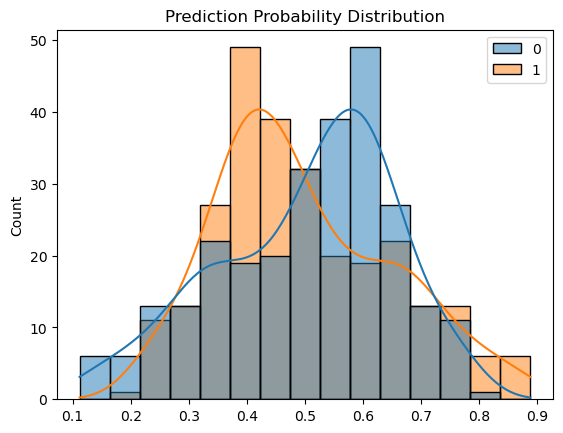

In [34]:
sns.histplot(pred_prob, kde=True)
plt.title('Prediction Probability Distribution')
plt.show()

In [35]:
df_test = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/main/6644a1e287df6_test_data_with_samplefeatures.csv')
df_test['winner'] = preds
# df_test['win_pred_score'] = np.max(pred_proba, axis=1)

winner_id = []
for i in range(len(df_test)):
  if df_test['winner'][i] == 0:
    winner_id.append(df_test['team1_id'][i])
  else:
    winner_id.append(df_test['team2_id'][i])

df_test['win_pred_team_id'] = winner_id

In [36]:
# df_test.to_csv('check.csv', index=False)